In [1]:
import torch
from torchvision import datasets, transforms
from torchvision.datasets import VOCSegmentation
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms.functional as F

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Target transform - converts PIL Image to tensor without normalization
target_transform = transforms.Compose([
    transforms.ToTensor(),
])

# Load VOC dataset
# Replace with your actual data path
root = "data/voc"


In [2]:

# Year can be '2007', '2008', '2009', '2010', '2011', or '2012'
train_dataset = VOCSegmentation(
    root=root,
    year="2012",
    image_set="train",
    download=True,  # Set to False if already downloaded
    transform=transform,
    target_transform=target_transform
)

val_dataset = VOCSegmentation(
    root=root,
    year="2012", 
    image_set="val",
    download=True,
    transform=transform,
    target_transform=target_transform
)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=4)


100%|██████████| 1999639040/1999639040 [01:03<00:00, 31342691.48it/s]


Extracting data/voc/VOCtrainval_11-May-2012.tar to data/voc
Using downloaded and verified file: data/voc/VOCtrainval_11-May-2012.tar
Extracting data/voc/VOCtrainval_11-May-2012.tar to data/voc


Training samples: 1464
Validation samples: 1449
Image shape: torch.Size([3, 281, 500])
Target shape: torch.Size([1, 281, 500])


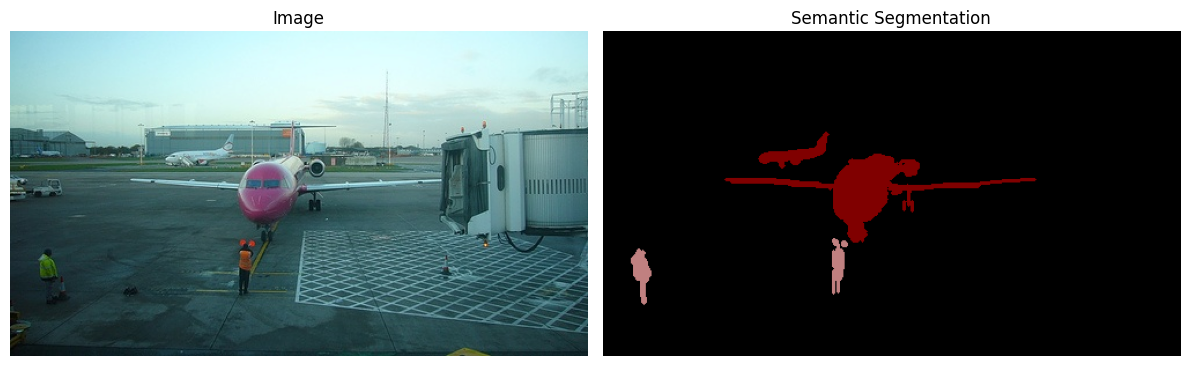

In [3]:

# Inspect the dataset
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")

# Pascal VOC classes (20 classes + background)
VOC_CLASSES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
    'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog',
    'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa',
    'train', 'tvmonitor'
]

# Define color map for visualization
def get_pascal_voc_colormap():
    """Returns the standard Pascal VOC colormap"""
    colormap = np.zeros((21, 3), dtype=np.uint8)
    colormap[0] = [0, 0, 0]  # background
    colormap[1] = [128, 0, 0]  # aeroplane
    colormap[2] = [0, 128, 0]  # bicycle
    colormap[3] = [128, 128, 0]  # bird
    colormap[4] = [0, 0, 128]  # boat
    colormap[5] = [128, 0, 128]  # bottle
    colormap[6] = [0, 128, 128]  # bus
    colormap[7] = [128, 128, 128]  # car
    colormap[8] = [64, 0, 0]  # cat
    colormap[9] = [192, 0, 0]  # chair
    colormap[10] = [64, 128, 0]  # cow
    colormap[11] = [192, 128, 0]  # diningtable
    colormap[12] = [64, 0, 128]  # dog
    colormap[13] = [192, 0, 128]  # horse
    colormap[14] = [64, 128, 128]  # motorbike
    colormap[15] = [192, 128, 128]  # person
    colormap[16] = [0, 64, 0]  # pottedplant
    colormap[17] = [128, 64, 0]  # sheep
    colormap[18] = [0, 192, 0]  # sofa
    colormap[19] = [128, 192, 0]  # train
    colormap[20] = [0, 64, 128]  # tvmonitor
    return colormap

# Function to decode segmentation mask
def decode_segmap(mask, colormap):
    """Convert a label mask to RGB using the colormap"""
    r = np.zeros_like(mask).astype(np.uint8)
    g = np.zeros_like(mask).astype(np.uint8)
    b = np.zeros_like(mask).astype(np.uint8)
    
    for l in range(0, len(colormap)):
        idx = mask == l
        r[idx] = colormap[l, 0]
        g[idx] = colormap[l, 1]
        b[idx] = colormap[l, 2]
    
    rgb = np.stack([r, g, b], axis=2)
    return rgb

# Function to visualize a sample
def visualize_sample(image, target):
    # Convert tensors to numpy arrays
    image = image.numpy().transpose(1, 2, 0)
    # Un-normalize the image
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    image = np.clip(image, 0, 1)
    
    # Target comes as 0-1 tensor, convert to class indices
    target = target.numpy()[0] * 255
    
    # VOC segmentation masks have values 0-255, but the actual class IDs are 0-20
    # Map each pixel to its class
    target_class = np.zeros_like(target, dtype=np.uint8)
    for i in range(21):
        target_class[target == i] = i
    
    # Apply colormap
    target_color = decode_segmap(target_class, get_pascal_voc_colormap())
    
    # Plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(image)
    ax[0].set_title("Image")
    ax[0].axis("off")
    
    ax[1].imshow(target_color)
    ax[1].set_title("Semantic Segmentation")
    ax[1].axis("off")
    
    plt.tight_layout()
    plt.show()

# Get a sample
image, target = train_dataset[0]
print(f"Image shape: {image.shape}")
print(f"Target shape: {target.shape}")

# Visualize
visualize_sample(image, target)

In [1]:
import torch
import os
import pandas as pd
from pathlib import Path
from tqdm import tqdm

import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
import torchvision as tv
import seaborn as sns
import matplotlib.pyplot as plt


# show some images:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix

import sklearn
from sklearn.decomposition import PCA
os.chdir("../..")
os.getcwd()

'/home/tmuehlen/repos/geonify/mvp'

In [2]:

from src.osm.overpass import get_overpass_data

from __future__ import annotations
from src.satvision.dataset import SentinelOsmDataset
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import numpy as np
import torch
from tqdm import tqdm

from src.satvision.dataset import CNT_COLS, create_sentinel_dataset

from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights, fcn_resnet101, FCN_ResNet101_Weights, deeplabv3_mobilenet_v3_large, DeepLabV3_MobileNet_V3_Large_Weights, deeplabv3_resnet101, DeepLabV3_ResNet101_Weights
# https://github.com/pytorch/vision/blob/main/torchvision/models/segmentation/fcn.py#L122
weights = FCN_ResNet50_Weights.DEFAULT
#transforms = weights.transforms(resize_size=None)

#model = fcn_resnet50(weights=weights, progress=False)
#model = model.eval()
from sklearn.cluster import MiniBatchKMeans
from torch.nn import Conv2d

In [ ]:
# create dataset:
transform_img =  transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    
])

ds = SentinelOsmDataset('/home/tmuehlen/repos/geonify/mvp/data/osm_sentinel_res_10_width_1000/data/osm_sentinel_res_10_width_1000', transform_img=transform_img)
ds_train, ds_val = torch.utils.data.random_split(ds, [0.85, 0.15])
ds.__len__()

# create dataloader
batch_size = 12
dl_train = DataLoader(ds_train, batch_size= batch_size, num_workers=12)
dl_val = DataLoader(ds_val, batch_size= batch_size, num_workers=12)
batch = next(iter(dl_train))
print("img batch shape:")
print(batch["image"].shape)
print("label batch shape:")
print(batch["label"].shape)

# Define a pixelwise autoencoder:

In [ ]:
# fcn50 = fcn_resnet50(weights=weights, progress=False)
# print(sum(p.numel() for p in fcn50.parameters()))
# tmp = fcn_resnet101(weights = FCN_ResNet101_Weights.DEFAULT, progress=False)
# print(sum(p.numel() for p in tmp.parameters()))
# tmp = deeplabv3_mobilenet_v3_large(weights = DeepLabV3_MobileNet_V3_Large_Weights.DEFAULT, progress=False)
# print(sum(p.numel() for p in tmp.parameters()))
# dl_model = deeplabv3_resnet101(weights = DeepLabV3_ResNet101_Weights.DEFAULT, progress=False)
# print(sum(p.numel() for p in dl_model.parameters()))


In [ ]:
class pxl_ae_kmeans_model(nn.Module):
    def __init__(self, emb_dim:int = 10, n_clusters:int = 40):
        super(pxl_ae_kmeans_model, self).__init__()
        weights = FCN_ResNet50_Weights.DEFAULT
        self.emb_dim = emb_dim
        
        self.enc = fcn_resnet50(weights=weights, progress=False)
        self.dec = fcn_resnet50(weights=weights, progress=False)

        # next step: make a parameter tensor for the cluster means
        self.enc.classifier[4] = Conv2d(512, self.emb_dim, kernel_size=(1, 1), stride=(1, 1))
        self.enc.aux_classifier[4] = Conv2d(256, self.emb_dim, kernel_size=(1, 1), stride=(1, 1))

        # self.kmeans_centroids = nn.Parameter(torch.randn(n_clusters, self.emb_dim)) 
        # self.register_parameter("kmeans_centroids", self.kmeans_centroids)
        self.kmeans_centroids = torch.randn(n_clusters, self.emb_dim) 

        self.dec.backbone.conv1 = Conv2d(self.emb_dim, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        self.dec.classifier[4] = Conv2d(512, 3, kernel_size=(1, 1), stride=(1, 1))
        self.dec.aux_classifier[4] = Conv2d(256, 3, kernel_size=(1, 1), stride=(1, 1))

        
    def forward(self, x):
        emb = self.enc(x)['out']
        recon = self.dec(emb)
        embs_flattened = emb.permute(1, 0, 2, 3).flatten(start_dim = 1).T
        return recon['out'], emb, self.kmeans_centroids, embs_flattened
        

In [ ]:
class pxl_ae_kmeans_model_deeplab_v3(nn.Module):
    def __init__(self, emb_dim:int = 10, n_clusters:int = 40):
        super(pxl_ae_kmeans_model_deeplab_v3, self).__init__()
        #weights = FCN_ResNet50_Weights.DEFAULT
        self.emb_dim = emb_dim
        
        self.enc = deeplabv3_resnet101(weights=DeepLabV3_ResNet101_Weights.DEFAULT, progress=False)
        self.dec = deeplabv3_resnet101(weights=DeepLabV3_ResNet101_Weights.DEFAULT, progress=False)


        self.enc.classifier[4] = Conv2d(256, self.emb_dim, kernel_size=(1, 1), stride=(1, 1))
        self.enc.aux_classifier[4] = Conv2d(256, self.emb_dim, kernel_size=(1, 1), stride=(1, 1))

        # self.kmeans_centroids = nn.Parameter(torch.randn(n_clusters, self.emb_dim)) 
        # self.register_parameter("kmeans_centroids", self.kmeans_centroids)
        self.kmeans_centroids = torch.randn(n_clusters, self.emb_dim) 
        self.dec.backbone.conv1 = Conv2d(self.emb_dim, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        
        self.dec.classifier[4] = Conv2d(256, 3, kernel_size=(1, 1), stride=(1, 1))
        self.dec.aux_classifier[4] = Conv2d(256, 3, kernel_size=(1, 1), stride=(1, 1))

        
    def forward(self, x):
        emb = self.enc(x)['out']
        recon = self.dec(emb)
        embs_flattened = emb.permute(1, 0, 2, 3).flatten(start_dim = 1).T
        return recon['out'], emb, self.kmeans_centroids, embs_flattened
        

### try out idea with kmeans


In [ ]:
emb_dim = 24
n_clusters = 100
#model = pxl_ae_kmeans_model(emb_dim=emb_dim, n_clusters=n_clusters)
model = pxl_ae_kmeans_model_deeplab_v3(emb_dim=emb_dim, n_clusters=n_clusters)

_ = model.cuda()
batch = next(iter(dl_train))

In [ ]:
output = model(batch['image'].cuda())
output[2].shape

In [ ]:
# # the following is a auxilary function to repeat the dimension to be able to calculate the distance to the centroids
# aux = output[1].permute(0, 2, 3, 1).flatten(1, 2).unsqueeze(-1).expand(-1, -1, -1, n_clusters)
# aux.shape

# # the following should be the distance to the cluster centroids
# distances = torch.square(aux - model.kmeans_centroids.T).sum(dim = 2)
# # now do the soft argmin
# rec_distances = torch.div(1, distances)
# soft_arg_min = torch.nn.functional.softmax(rec_distances, dim = 2)

# dist_sargmin_sum = (soft_arg_min * distances).sum(dim = 2)
# soft_arg_min
# distances
# dist_sargmin_sum.shape

# loss_kmeans = nn.MSELoss()

# l_value = loss_kmeans((soft_arg_min * distances).sum(dim = 2), torch.zeros_like(dist_sargmin_sum))

# l_value.backward()

### Do a loop to train the kmeans minibatch version:

In [ ]:
kmeans = MiniBatchKMeans(n_clusters=n_clusters,
                         random_state=0,
                         batch_size=batch_size * 224 * 224,
                         n_init="auto")

with torch.no_grad():
    for batch in tqdm(dl_train):
        output = model(batch['image'].cuda())
        kmeans = kmeans.partial_fit(output[3].detach().cpu().numpy())
#kmeans = kmeans.partial_fit(output[3].detach().cpu().numpy())

model.kmeans_centroids = torch.tensor(kmeans.cluster_centers_).float().cuda()


In [ ]:


# #model.kmeans_centroids.unsqueeze(0).shape
# embs_flattened = output[1].flatten(start_dim = 2).permute(0, 2, 1)
# print(embs_flattened.shape)
# distances = torch.cdist(embs_flattened, model.kmeans_centroids)
# distances.shape

# rec_distances = torch.div(1, distances)
# print(rec_distances.shape)

# temperature = 0.0001
# soft_arg_min = torch.nn.functional.softmax(rec_distances / temperature, dim = 2)
# print(soft_arg_min.shape)
# soft_arg_min[0, 15, :]

# loss_kmeans = nn.MSELoss( reduction='mean')
# print(distances.shape, soft_arg_min.shape)
# loss_kmeans(soft_arg_min * distances, torch.zeros_like(distances))

# do 2 seperate optimizers:
# optimizer_nn = optim.Adam(model.parameters(), lr=1e-3)

# optimizer_km = optim.Adam([model.kmeans_centroids], lr = 1e-3)
# loss_fct_kmeans = LossKmeans(emb_dim=emb_dim, n_clusters=n_clusters)

# optimizer_km.zero_grad()
# loss_kmeans = loss_fct_kmeans(output[1], model.kmeans_centroids)
# loss_kmeans.backward()
# optimizer_km.step()


In [ ]:
#comb_loss = CombinedLoss(alpha = 0.999)
#km_loss_fct = LossKmeans(emb_dim=emb_dim, n_clusters=n_clusters)
#km_loss_fct = LossKmeans2(emb_dim=emb_dim, n_clusters=n_clusters, temperature=0.0005, alpha=0.0)
recon_loss_fct = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=5e-4)
alpha = 0.05


In [ ]:
#batch = next(iter(dl_train))
for epoch in range(20):
    recon_losses = []
    km_losses = []
    losses = []
    # cluster_assignments = []
    for i, batch in enumerate(dl_train):
        optimizer.zero_grad()
        output = model(batch['image'].cuda())
        recon_loss = recon_loss_fct(batch['image'].cuda(), output[0])
        #km_loss = km_loss_fct(output[1], model.kmeans_centroids)
        #loss= alpha * recon_loss + (1 - alpha) * km_loss
        loss= recon_loss 
        #recon_losses.append(recon_loss.item())
        #km_losses.append(km_loss.item())
        losses.append(loss.item())
        #print(i, recon_loss, km_loss, loss)
        loss.backward()
        optimizer.step()
        #embs_flattened = output[1].permute(1, 0, 2, 3).flatten(start_dim = 1).detach().cpu().numpy().transpose()
        #dm = distance_matrix(embs_flattened, model.kmeans_centroids.detach().cpu().numpy())
        #cluster_assignments.extend(dm.argmin(axis = 1).tolist())
        if i % 50 == 0: 
            #print('epoch', epoch, 'batch', i,', recon:', np.round(pd.Series(recon_losses).mean(), 4), ', km: ', np.round(pd.Series(km_losses).mean(), 3), ', loss: ', np.round(pd.Series(losses).mean(), 4), ', centroids norm:', torch.norm(model.kmeans_centroids, p=2).item())
            print('epoch', epoch, 'batch', i,', loss: ', np.round(pd.Series(losses).mean(), 4), ', centroids norm:', torch.norm(model.kmeans_centroids, p=2).item())
            embs_flattened = output[1].permute(1, 0, 2, 3).flatten(start_dim = 1).detach().cpu().numpy().transpose()
            dm = distance_matrix(embs_flattened, model.kmeans_centroids.detach().cpu().numpy())
            print(np.stack(np.unique(dm.argmin(axis = 1), return_counts=True), axis = 0))
            #print(np.stack(np.unique(np.array(cluster_assignments), return_counts=True), axis = 0))

    kmeans = MiniBatchKMeans(n_clusters=n_clusters,
                            random_state=0,
                            batch_size=batch_size * 224 * 224,
                            n_init="auto")

    with torch.no_grad():
        for batch in tqdm(dl_train):
            output = model(batch['image'].cuda())
            kmeans = kmeans.partial_fit(output[3].detach().cpu().numpy())

    model.kmeans_centroids = torch.tensor(kmeans.cluster_centers_).float().cuda()



In [ ]:
kmeans = MiniBatchKMeans(n_clusters=n_clusters,
                        random_state=0,
                        batch_size=batch_size * 224 * 224,
                        n_init="auto")

with torch.no_grad():
    for batch in tqdm(dl_train):
        output = model(batch['image'].cuda())
        kmeans = kmeans.partial_fit(output[3].detach().cpu().numpy())

model.kmeans_centroids = torch.tensor(kmeans.cluster_centers_).float().cuda()

In [ ]:
def unnormalize(tensor, mean, std):
    """
    Reverses the normalization of a tensor using the given mean and std.
    
    Args:
        tensor (torch.Tensor): The normalized tensor with shape [C, H, W].
        mean (list or tuple): The mean used in normalization, one value per channel.
        std (list or tuple): The std used in normalization, one value per channel.
    
    Returns:
        torch.Tensor: The un-normalized tensor.
    """
    mean = torch.tensor(mean).view(-1, 1, 1)
    std = torch.tensor(std).view(-1, 1, 1)
    return tensor * std + mean

# Example usage
normalized_image = torch.randn(3, 224, 224)  # Simulated normalized tensor
mean = [0.485, 0.456, 0.406]  # Example mean for ImageNet
std = [0.229, 0.224, 0.225]  # Example std for ImageNet

unnormalized_image = unnormalize(normalized_image, mean, std)

In [ ]:
batch = next(iter(dl_train))
recon, emb, kmc, emb_flat = model(batch['image'].cuda())

for i in range(4):
    plt.figure(figsize = (12, 6))
    plt.subplot(121)
    plt.imshow(unnormalize(recon[i].cpu().detach(), mean, std).permute(1, 2, 0))
    plt.subplot(122)
    plt.imshow(unnormalize(batch['image'][i], mean, std).permute(1, 2, 0))
    plt.show()


In [ ]:
embs_flattened = emb.permute(1, 0, 2, 3).flatten(start_dim = 1).detach().cpu().numpy().transpose()
dm = distance_matrix(embs_flattened, model.kmeans_centroids.detach().cpu().numpy())
embs_flattened.shape

In [ ]:
pca = PCA(2)
pca_embs = pca.fit_transform(embs_flattened)
pca_embs.shape
df = pd.DataFrame(embs_flattened)
df["pca_0"] = pca_embs[:,0]
df["pca_1"] = pca_embs[:,1]
df.head(1)


In [ ]:
df['cluster_id_nn'] = dm.argmin(axis = 1)
df['cluster_id_nn'] = df['cluster_id_nn'].astype(str)


In [ ]:
kmeans_one_batch = KMeans(n_clusters=n_clusters)
kmeans_one_batch.fit(embs_flattened)

df["cluster_id_km"] = kmeans_one_batch.labels_
df["cluster_id_km"] = df.cluster_id_km.astype(str)
#df.cluster.value_counts()

In [ ]:
#sns.pairplot(embs_flattened_df.sample(1000))
#plt.show()
df.head(2)

In [ ]:
pd.crosstab(df.cluster_id_nn, df.cluster_id_km,margins = True)

In [ ]:
sns.scatterplot(data = df, x = "pca_0", y = "pca_1", s = 2, hue = "cluster_id_nn")
plt.show()

sns.scatterplot(data = df, x = "pca_0", y = "pca_1", s = 2, hue = "cluster_id_km")
plt.show()


In [ ]:
kmeans_labels_unflattened = torch.tensor(kmeans.predict(embs_flattened)).unflatten(dim = 0, sizes = (batch['image'].shape[0], 1, 224, 224))

In [ ]:
h, w = 224, 224
alpha = 0.15
for i in range(2):
    plt.figure(figsize=(48, 8))
    plt.subplot(161)
    plt.imshow(unnormalize(recon[i].cpu().detach(), mean, std).permute(1, 2, 0))
    plt.subplot(162)
    plt.imshow(unnormalize(batch['image'][i], mean, std).permute(1, 2, 0))
    plt.subplot(163)
    plt.imshow(unnormalize(batch['image'][i], mean, std).permute(1, 2, 0))
    color=[0.8, 0, 0]
    mask = (kmeans_labels_unflattened[i] == 26)[0]
    mask_rgba = np.zeros((h, w, 4))
    mask_rgba[mask, 0:3] = color  # RGB channels
    mask_rgba[mask, 3] = alpha    # Alpha channel
    plt.imshow(mask_rgba)
    color=[0, 0.8, 0]
    mask = (kmeans_labels_unflattened[i] == 3)[0]
    mask_rgba = np.zeros((h, w, 4))
    mask_rgba[mask, 0:3] = color  # RGB channels
    mask_rgba[mask, 3] = alpha    # Alpha channel
    plt.imshow(mask_rgba)
    color=[0, 0, 0.8]
    mask = (kmeans_labels_unflattened[i] == 31)[0]
    mask_rgba = np.zeros((h, w, 4))
    mask_rgba[mask, 0:3] = color  # RGB channels
    mask_rgba[mask, 3] = alpha    # Alpha channel
    plt.imshow(mask_rgba)

    plt.subplot(164)
    #plt.imshow((kmeans_labels_unflattened[i]/n_clusters).permute(1, 2, 0))
    plt.imshow(((kmeans_labels_unflattened[i] == 0).int() / 8).permute(1, 2, 0))
    plt.subplot(165)
    #plt.imshow((kmeans_labels_unflattened[i]/n_clusters).permute(1, 2, 0))
    plt.imshow(((kmeans_labels_unflattened[i] == 9).int() / 8).permute(1, 2, 0))
    plt.subplot(166)
    #plt.imshow((kmeans_labels_unflattened[i]/n_clusters).permute(1, 2, 0))
    plt.imshow(((kmeans_labels_unflattened[i] == 6).int() / 8).permute(1, 2, 0))
    plt.show()


### just local autoencoder:

In [ ]:
class pxl_ae_model(nn.Module):
    def __init__(self, emb_dim:int = 10):
        super(pxl_ae_model, self).__init__()
        weights = FCN_ResNet50_Weights.DEFAULT
        self.emb_dim = emb_dim
        
        self.enc = fcn_resnet50(weights=weights, progress=False)
        self.dec = fcn_resnet50(weights=weights, progress=False)

        self.enc.classifier[4] = Conv2d(512, self.emb_dim, kernel_size=(1, 1), stride=(1, 1))
        self.enc.aux_classifier[4] = Conv2d(256, self.emb_dim, kernel_size=(1, 1), stride=(1, 1))
        
        self.dec.backbone.conv1 = Conv2d(self.emb_dim, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

        self.dec.classifier[4] = Conv2d(512, 3, kernel_size=(1, 1), stride=(1, 1))
        self.dec.aux_classifier[4] = Conv2d(256, 3, kernel_size=(1, 1), stride=(1, 1))

        
    def forward(self, x):
        emb = self.enc(x)['out']
        recon = self.dec(emb)
        return recon['out'], emb
        

In [ ]:
model = pxl_ae_model(emb_dim=24)

In [ ]:
#batch = next(iter(dl_train))
batch.keys()
output = model(batch['image'])
print(output[1].shape, output[0].shape)


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss() # standard reconstruction loss


In [ ]:
ckpt = torch.load('/home/tmuehlen/repos/geonify/mvp/data/checkpoints/pixelwise_ae/double_FCN_checkpoint_epoch_emb_dim_24_18_batch_240_test_loss_0.089.ckpt')

In [ ]:
model.load_state_dict(ckpt['model_state_dict'])


### Check some reconstructed images:

In [ ]:
batch = next(iter(dl_val))
recon, emb = model(batch['image'].cuda())

for i in range(4):
    plt.figure(figsize = (12, 6))
    plt.subplot(121)
    plt.imshow(unnormalize(recon[i].cpu().detach(), mean, std).permute(1, 2, 0))
    plt.subplot(122)
    plt.imshow(unnormalize(batch['image'][i], mean, std).permute(1, 2, 0))
    plt.show()


### Create the embedding values as prep for clustering

In [ ]:
num_samples_per_batch = 100
embs_sampled_list = []
for batch in tqdm(dl_train):
    with torch.no_grad():
        _, emb = model(batch["image"].cuda())
        embs_flattened = emb.permute(1, 0, 2, 3).flatten(start_dim = 1).detach().cpu().numpy().transpose()
        indices = torch.randint(0, embs_flattened.shape[0], (num_samples_per_batch,))
        embs_sampled_list.append(embs_flattened[indices])

In [ ]:
embs_sampled = np.concatenate(embs_sampled_list)
embs_sampled.shape

In [ ]:
# sns.pairplot(pd.DataFrame(embs_sampled))
# plt.show()

### PCA


In [ ]:
pca = PCA(2)
pca_embs = pca.fit_transform(embs_sampled)
pca_embs.shape
df = pd.DataFrame(embs_sampled)
df["pca_0"] = pca_embs[:,0]
df["pca_1"] = pca_embs[:,1]
df.head(1)

sns.scatterplot(data = df, x = "pca_0", y = "pca_1", s = 2)
plt.show()

In [ ]:
sns.scatterplot(data = df, x = "pca_0", y = "pca_1", s = 2)
plt.show()

### Based on the scatterplot, DBSCAN might also be a good option... 
But start with kmeans

In [ ]:
n_clusters = 36
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(embs_sampled)

df["cluster"] = kmeans.labels_
df["cluster"] = df.cluster.astype(str)
df.cluster.value_counts()


In [ ]:
df.head(2)

In [ ]:
# sns.pairplot(data = df.drop(columns = ['pca_0', 'pca_1']), hue = 'cluster')
# plt.show()


In [ ]:
# Ideally this is done during training as well
#kmeans.predict(embs_sampled)


#kmeans_labels_unflattened = torch.tensor(kmeans.labels_.reshape((1, -1))).unflatten(dim = 1, sizes = (8, 224, 224)).permute(1, 0, 2, 3)
#kmeans_labels_unflattened.shape


#num_samples_per_batch = 200
#embs_sampled_list = []
#for batch in tqdm(dl_val):
batch = next(iter(dl_val))
for batch in tqdm(dl_val):
    with torch.no_grad():
        recon, emb = model(batch["image"].cuda())
        embs_flattened = emb.permute(1, 0, 2, 3).flatten(start_dim = 1).detach().cpu().numpy().transpose()



In [ ]:
print(embs_flattened.shape)
kmeans.predict(embs_flattened).shape
batch["image"].shape

In [ ]:

#kmeans_labels_unflattened = torch.tensor(kmeans.predict(embs_flattened).reshape((1, -1))).unflatten(dim = 1, sizes = (8, 224, 224)).permute(1, 0, 2, 3)

#torch.tensor(kmeans.predict(embs_flattened).reshape((1, -1))).unflatten(dim = 1, sizes = (32, 1, 224, 224))
embs_flattened = emb.permute(1, 0, 2, 3).flatten(start_dim = 1).detach().cpu().numpy().transpose()

kmeans_labels_unflattened = torch.tensor(kmeans.predict(embs_flattened)).unflatten(dim = 0, sizes = (batch['image'].shape[0], 1, 224, 224))

In [ ]:
pd.Series(kmeans.predict(embs_flattened)).value_counts()


In [ ]:
# 10*224*224*32
#embs_flattened.shape
# kmeans.predict(embs_flattened).shape
(kmeans_labels_unflattened[i]/8).permute(1, 2, 0)
((kmeans_labels_unflattened == 0).int() / 8)[0, 0, 0, -1]

(kmeans_labels_unflattened[i] == 6).int() / 8

In [ ]:
h, w = 224, 224
alpha = 0.15
for i in range(2):
    plt.figure(figsize=(48, 8))
    plt.subplot(161)
    plt.imshow(unnormalize(recon[i].cpu().detach(), mean, std).permute(1, 2, 0))
    plt.subplot(162)
    plt.imshow(unnormalize(batch['image'][i], mean, std).permute(1, 2, 0))
    plt.subplot(163)
    plt.imshow(unnormalize(batch['image'][i], mean, std).permute(1, 2, 0))
    color=[0.8, 0, 0]
    mask = (kmeans_labels_unflattened[i] == 26)[0]
    mask_rgba = np.zeros((h, w, 4))
    mask_rgba[mask, 0:3] = color  # RGB channels
    mask_rgba[mask, 3] = alpha    # Alpha channel
    plt.imshow(mask_rgba)
    color=[0, 0.8, 0]
    mask = (kmeans_labels_unflattened[i] == 3)[0]
    mask_rgba = np.zeros((h, w, 4))
    mask_rgba[mask, 0:3] = color  # RGB channels
    mask_rgba[mask, 3] = alpha    # Alpha channel
    plt.imshow(mask_rgba)
    color=[0, 0, 0.8]
    mask = (kmeans_labels_unflattened[i] == 31)[0]
    mask_rgba = np.zeros((h, w, 4))
    mask_rgba[mask, 0:3] = color  # RGB channels
    mask_rgba[mask, 3] = alpha    # Alpha channel
    plt.imshow(mask_rgba)

    plt.subplot(164)
    #plt.imshow((kmeans_labels_unflattened[i]/n_clusters).permute(1, 2, 0))
    plt.imshow(((kmeans_labels_unflattened[i] == 0).int() / 8).permute(1, 2, 0))
    plt.subplot(165)
    #plt.imshow((kmeans_labels_unflattened[i]/n_clusters).permute(1, 2, 0))
    plt.imshow(((kmeans_labels_unflattened[i] == 9).int() / 8).permute(1, 2, 0))
    plt.subplot(166)
    #plt.imshow((kmeans_labels_unflattened[i]/n_clusters).permute(1, 2, 0))
    plt.imshow(((kmeans_labels_unflattened[i] == 6).int() / 8).permute(1, 2, 0))
    plt.show()


In [ ]:
mask.shape
(kmeans_labels_unflattened[i] == 6)[0]

In [ ]:
h, w = 224, 224
alpha = 0.85
color = 'grey'
for i in range(5):
    plt.figure(figsize=(24, 6))
    plt.subplot(131)
    plt.imshow(unnormalize(batch['image'][i], mean, std).permute(1, 2, 0))
    plt.subplot(132)
    plt.imshow(unnormalize(batch['image'][i], mean, std).permute(1, 2, 0))
    mask = (kmeans_labels_unflattened[i] == 31)[0]
    y_indices, x_indices = np.where(mask)
    plt.scatter(x_indices, y_indices, c=color, alpha=alpha, s=1)   
    plt.subplot(133)
    plt.imshow(unnormalize(batch['image'][i], mean, std).permute(1, 2, 0))
    mask = (kmeans_labels_unflattened[i] != 31)[0]
    y_indices, x_indices = np.where(mask)
    plt.scatter(x_indices, y_indices, c=color, alpha=alpha, s=1)   
    plt.show()


# Notebook junkyard

In [ ]:
# # maybe later still usefull, some loss thoughts:
# class LossKmeans(nn.Module):
#     def __init__(self, emb_dim:int = 10, n_clusters:int = 40):
#         super(LossKmeans, self).__init__()
#         self.loss_kmeans = nn.MSELoss( reduction='mean')
#         self.emb_dim = emb_dim
#         self.n_clusters = n_clusters
        
#     def forward(self, emb, kmeans_centroids):
#         # calculate the reconstruction loss
#         #l_recon = self.loss_recon(x, recon)
        
#         # calculate the kmeans loss
#         aux = emb.permute(0, 2, 3, 1).flatten(1, 2).unsqueeze(-1).expand(-1, -1, -1, self.n_clusters)
#         distances = torch.square(aux - kmeans_centroids.T).sum(dim = 2)
#         rec_distances = torch.div(1, distances + 1e-5)
#         soft_arg_min = torch.nn.functional.softmax(rec_distances, dim = 2)
#         dist_sargmin_sum = (soft_arg_min * distances).sum(dim = 2)
#         l_kmeans = self.loss_kmeans(dist_sargmin_sum, torch.zeros_like(dist_sargmin_sum)) + 0.1 * (1 / (torch.norm(kmeans_centroids, p=2) + 1e-5))
#         # I think this needs regulization, of the centroids, otherwise, the most simple solution would be to make centroids and embeddings smaller and smaller.

#         return l_kmeans

# class LossKmeans2(nn.Module):
#     def __init__(self, emb_dim:int = 10, n_clusters:int = 40, temperature:float = 0.0001, alpha = 0.1):
#         super(LossKmeans2, self).__init__()
#         self.loss_kmeans = nn.MSELoss( reduction='mean')
#         self.emb_dim = emb_dim
#         self.n_clusters = n_clusters
#         self.temperature = temperature
#         self.alpha = alpha
        
#     def forward(self, emb, kmeans_centroids):
#         # calculate the reconstruction loss
#         #l_recon = self.loss_recon(x, recon)
#         embs_flattened = emb.flatten(start_dim = 2).permute(0, 2, 1)
#         distances = torch.cdist(embs_flattened, kmeans_centroids)
#         rec_distances = torch.div(1, distances)
#         soft_arg_min = torch.nn.functional.softmax(rec_distances / self.temperature, dim = 2)
#         l_kmeans = self.loss_kmeans(soft_arg_min * distances, torch.zeros_like(distances)) + self.alpha * (1 / (torch.norm(kmeans_centroids, p=2) + 1e-5))
#         # I think this needs regulization, of the centroids, otherwise, the most simple solution would be to make centroids and embeddings smaller and smaller.

#         return l_kmeans

# def _compute_distances(self, X, centroids):
#     """Compute pairwise squared Euclidean distances."""
#     # Expand dimensions for broadcasting
#     X_expanded = X.unsqueeze(1)  # Shape: [n_samples, 1, n_features]
#     centroids_expanded = centroids.unsqueeze(0)  # Shape: [1, n_clusters, n_features]
    
#     # Compute squared distances
#     squared_diffs = (X_expanded - centroids_expanded) ** 2  # Shape: [n_samples, n_clusters, n_features]
#     distances = torch.sum(squared_diffs, dim=2)  # Shape: [n_samples, n_clusters]
    
#     return distances

# def _compute_loss(self, X, centroids):
#     """Compute K-means loss (sum of squared distances to nearest centroid)."""
#     distances = self._compute_distances(X, centroids)
#     min_distances = torch.min(distances, dim=1)[0]  # Get minimum distance for each sample
#     return torch.mean(min_distances)  # Return mean for stable gradients

# #model.kmeans_centroids.unsqueeze(0).shape
# embs_flattened = output[1].flatten(start_dim = 2).permute(0, 2, 1)
# print(embs_flattened.shape)
# distances = torch.cdist(embs_flattened, model.kmeans_centroids)
# distances.shape

# rec_distances = torch.div(1, distances)
# print(rec_distances.shape)

# temperature = 0.0001
# soft_arg_min = torch.nn.functional.softmax(rec_distances / temperature, dim = 2)
# print(soft_arg_min.shape)
# soft_arg_min[0, 15, :]

# loss_kmeans = nn.MSELoss( reduction='mean')
# print(distances.shape, soft_arg_min.shape)
# loss_kmeans(soft_arg_min * distances, torch.zeros_like(distances))

### Pixelwise autoencoder

So far pure copy over, still needs to be adapted


In [ ]:
# add dims to be able to transform scaled images back
mean = torch.tensor(img_mean).view(-1, 1, 1)
std = torch.tensor(img_std).view(-1, 1, 1)

### Visually check reconstructions:

In [ ]:
_ = model.cuda()

In [ ]:
batch = next(iter(dl_test))


In [ ]:
recon, emb = model(batch["image"].cuda())
img_rescaled = (batch["image"] * std) + mean
recon_rescaled = (recon.cpu() * std) + mean

In [ ]:
recon.shape

In [ ]:
for i in range(8):
    plt.figure(figsize=(15, 30))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rescaled[i].permute(1, 2, 0).clip(0, 1))
    plt.subplot(1, 2, 2)
    plt.imshow(recon_rescaled[i].detach().permute(1, 2, 0).numpy().clip(0, 1))
    plt.show()

In [ ]:
embs_flattened = emb.permute(1, 0, 2, 3).flatten(start_dim = 1).detach().cpu().numpy().transpose()
embs_flattened.shape


In [ ]:
mask_flattened = batch["mask"].permute(1, 0, 2, 3).flatten(start_dim = 1).numpy().transpose()
mask_flattened.shape


### Visualize and cluster results for one batch:

In [ ]:
mask_flattened.round().shape

In [ ]:
pca = PCA(2)
pca_embs = pca.fit_transform(embs_flattened)
pca_embs.shape
df = pd.DataFrame(embs_flattened)
df["pca_0"] = pca_embs[:,0]
df["pca_1"] = pca_embs[:,1]
df.head(1)

sns.scatterplot(data = df, x = "pca_0", y = "pca_1", hue = "mask_value", s = 1)
plt.show()


In [ ]:
df.mask_value.value_counts()

In [ ]:
# Ideally this is done during training as well
kmeans = KMeans(n_clusters=8)
kmeans.fit(embs_flattened)
df["cluster"] = kmeans.labels_
df["cluster"] = df.cluster.astype(str)
df.cluster.value_counts()

kmeans_labels_unflattened = torch.tensor(kmeans.labels_.reshape((1, -1))).unflatten(dim = 1, sizes = (8, 225, 300)).permute(1, 0, 2, 3)
kmeans_labels_unflattened.shape

for i in range(8):
    plt.figure(figsize=(10, 30))
    plt.subplot(1, 3, 1)
    plt.imshow(img_rescaled[i].permute(1, 2, 0))
    plt.subplot(1, 3, 2)
    plt.imshow(kmeans_labels_unflattened[i, 0])
    plt.subplot(1, 3, 3)
    plt.imshow(batch["mask"][i, 0])
    plt.show()

In [ ]:
kmeans_labels_unflattened = torch.tensor(kmeans.labels_.reshape((1, -1))).unflatten(dim = 1, sizes = (8, 225, 300)).permute(1, 0, 2, 3)
kmeans_labels_unflattened.shape


In [ ]:
mask_flattened = batch["mask"].permute(1, 0, 2, 3).flatten(start_dim = 1).numpy().transpose()


### For the middle plot, no(!) labeled data is used.

In [ ]:
for i in range(8):
    plt.figure(figsize=(10, 30))
    plt.subplot(1, 3, 1)
    plt.imshow(img_rescaled[i].permute(1, 2, 0))
    plt.subplot(1, 3, 2)
    plt.imshow(kmeans_labels_unflattened[i, 0])
    plt.subplot(1, 3, 3)
    plt.imshow(batch["mask"][i, 0])
    plt.show()

In [ ]:
class CombinedLoss(nn.Module):
    def __init__(self, emb_dim:int = 10, n_clusters:int = 40, alpha:float = 0.5):
        super(CombinedLoss, self).__init__()
        self.loss_recon = nn.MSELoss()
        self.loss_kmeans = nn.MSELoss()
        self.emb_dim = emb_dim
        self.n_clusters = n_clusters
        self.alpha = alpha
        
    def forward(self, x, recon, emb, kmeans_centroids):
        # calculate the reconstruction loss
        l_recon = self.loss_recon(x, recon)
        
        # calculate the kmeans loss
        aux = emb.permute(0, 2, 3, 1).flatten(1, 2).unsqueeze(-1).expand(-1, -1, -1, self.n_clusters)
        distances = torch.square(aux - kmeans_centroids.T).sum(dim = 2)
        rec_distances = torch.div(1, distances)
        soft_arg_min = torch.nn.functional.softmax(rec_distances, dim = 2)
        dist_sargmin_sum = (soft_arg_min * distances).sum(dim = 2)
        l_kmeans = self.loss_kmeans(dist_sargmin_sum, torch.zeros_like(dist_sargmin_sum))

        return self.alpha * l_recon + (1 - self.alpha) * l_kmeans

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.89it/s]
test eval: loss = 0.08887686233880908
epoch 9, batch 90 out of 242, training loss: 0.09426925552415323
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.31478251395530477
epoch 9, batch 120 out of 242, training loss: 0.0940224882369199
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.09370551033075465
epoch 9, batch 150 out of 242, training loss: 0.09335594338099688
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.91it/s]
test eval: loss = 0.10656139081300692
epoch 9, batch 180 out of 242, training loss: 0.09344600112234032
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.91it/s]
test eval: loss = 0.08625104087729786
epoch 9, batch 210 out of 242, training loss: 0.0933359403745823
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.10303250405677529
epoch 9, batch 240 out of 242, training loss: 0.09327794181731727
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.11186247474925462
epoch 10, batch 30 out of 242, training loss: 0.09370001597750571
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.89it/s]
test eval: loss = 0.09062513171933419
epoch 10, batch 60 out of 242, training loss: 0.09330680502242729
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.08768315959808438
epoch 10, batch 90 out of 242, training loss: 0.09294008430871335
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.14472687712242438
epoch 10, batch 120 out of 242, training loss: 0.09270992758106594
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.08991755042658296
epoch 10, batch 150 out of 242, training loss: 0.09214750785898689
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.12307138325170029
epoch 10, batch 180 out of 242, training loss: 0.09235572061650661
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.91it/s]
test eval: loss = 0.1089532756528189
epoch 10, batch 210 out of 242, training loss: 0.0923390133191624
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.09617998901494713
epoch 10, batch 240 out of 242, training loss: 0.09232247592997254
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.1085729893556861
epoch 11, batch 30 out of 242, training loss: 0.09241319495824075
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.08777171044155609
epoch 11, batch 60 out of 242, training loss: 0.09215437413239089
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.09206635626249535
epoch 11, batch 90 out of 242, training loss: 0.09186826163268351
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.09938281514616899
epoch 11, batch 120 out of 242, training loss: 0.09172650204956038
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.10779853962188543
epoch 11, batch 150 out of 242, training loss: 0.09117641038452552
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.91it/s]
test eval: loss = 0.09113858640193939
epoch 11, batch 180 out of 242, training loss: 0.09131294686491317
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.91it/s]
test eval: loss = 0.09484602510929108
epoch 11, batch 210 out of 242, training loss: 0.0913504216272684
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.10244502993517143
epoch 11, batch 240 out of 242, training loss: 0.09138785995141105
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.91it/s]
test eval: loss = 0.20188559279885404
epoch 12, batch 30 out of 242, training loss: 0.0928717827604663
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.10233770310878754
epoch 12, batch 60 out of 242, training loss: 0.09236258646992386
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.08592218871033469
epoch 12, batch 90 out of 242, training loss: 0.09204629350167054
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.91it/s]
test eval: loss = 0.08813003554593685
epoch 12, batch 120 out of 242, training loss: 0.09180785512382333
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.16727073577254317
epoch 12, batch 150 out of 242, training loss: 0.09119597763217838
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.10462284278731014
epoch 12, batch 180 out of 242, training loss: 0.09128646507282942
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.08644660718219224
epoch 12, batch 210 out of 242, training loss: 0.09127868475365977
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.09646983098152072
epoch 12, batch 240 out of 242, training loss: 0.09127297221501339
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.89it/s]
test eval: loss = 0.08843011928852214
epoch 13, batch 30 out of 242, training loss: 0.09162748965524858
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.09252553000006565
epoch 13, batch 60 out of 242, training loss: 0.09149120051841267
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.08734526017377543
epoch 13, batch 90 out of 242, training loss: 0.0912306180203354
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.08701066586167314
epoch 13, batch 120 out of 242, training loss: 0.09112168503694298
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.25526300644458727
epoch 13, batch 150 out of 242, training loss: 0.09058329408729313
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.13056637745263966
epoch 13, batch 180 out of 242, training loss: 0.09080603512940486
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.2380715943006582
epoch 13, batch 210 out of 242, training loss: 0.09088917472068732
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.17095915176147639
epoch 13, batch 240 out of 242, training loss: 0.09092414128706168
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.1961073211805765
epoch 14, batch 30 out of 242, training loss: 0.09174304527621116
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.08619842487712238
epoch 14, batch 60 out of 242, training loss: 0.09174363534958636
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.91it/s]
test eval: loss = 0.09376694539258647
epoch 14, batch 90 out of 242, training loss: 0.09146109174241077
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.91it/s]
test eval: loss = 0.10259848538526269
epoch 14, batch 120 out of 242, training loss: 0.09133755785128302
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.91it/s]
test eval: loss = 0.09048658990582754
epoch 14, batch 150 out of 242, training loss: 0.09073109584336249
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.18858084307853565
epoch 14, batch 180 out of 242, training loss: 0.09088499469487048
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.08538115509720735
epoch 14, batch 210 out of 242, training loss: 0.09094351434735891
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.90it/s]
test eval: loss = 0.10171551257371902
epoch 14, batch 240 out of 242, training loss: 0.09104848708725569
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 43/43 [00:22<00:00,  1.91it/s]
test eval: loss = 3.7949924640530766
>>> 